In [32]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import toolsets.spectra_plotter as plotter
import toolsets.spectra_operations as so
from rdkit import Chem
import toolsets.denoising_related_functions as drf
import toolsets.chem_utils as cu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
fig_dir= '/Users/fanzhoukong/Desktop/UCDAVIS_Phd/spectral_denoising/figs'

# Figure 1

In [3]:
data = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/Alkaloids_lib/QTTOF_pos.csv')

In [4]:
specs = []
for index, row in data.iterrows():
    specs.append(so.convert_string_to_arr(row['msms']))
data['msms']=specs

In [24]:
spec_d = drf.entropy_denoising(spec)

In [48]:
mass, intensity = so.break_spectra(row['msms'])
mass = np.append(mass, row['precursor_mz']-20.12)
intensity = np.append(intensity, 321)
spec = so.pack_spectra(mass, intensity)
spec_d = drf.entropy_denoising(spec)

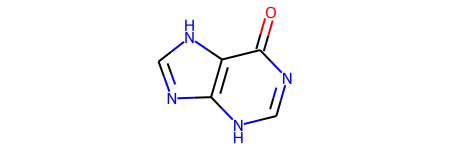

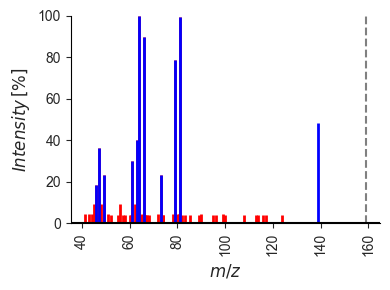

In [31]:
row = data.iloc[4]
spec = row['msms']

plotter.ms2_overlay(spec,spec_d, pmz = row['precursor_mz'],
                    savepath= os.path.join(fig_dir, 'fig1_with_electric_noise.png')
                    )
Chem.MolFromSmiles(row['reference_smiles'])

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

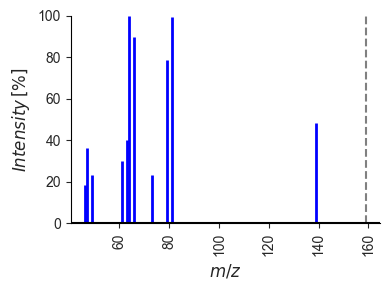

In [39]:
plotter.ms2_plot(spec_d, pmz = row['precursor_mz'],
                    savepath= os.path.join(fig_dir, 'fig1_no_electric_noise.png')
                    )

In [40]:
spec_dd = drf.spectral_denoising(spec, row['reference_smiles'], row['reference_adduct'])

In [52]:
so.normalized_entropy(spec_dd)

0.7752018039584484

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

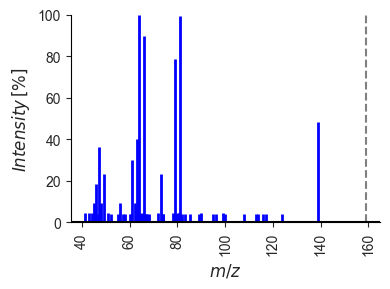

In [49]:
plotter.ms2_plot(spec, row['precursor_mz'])

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

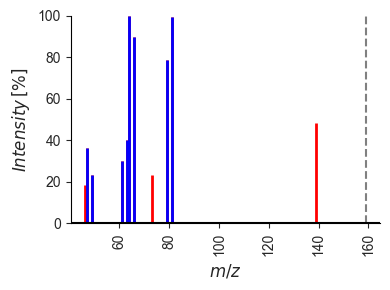

In [43]:
plotter.ms2_overlay(spec_d, spec_dd, pmz = row['precursor_mz'],
                 savepath= os.path.join(fig_dir, 'fig1_with_chemical_noise.png')
                 )

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

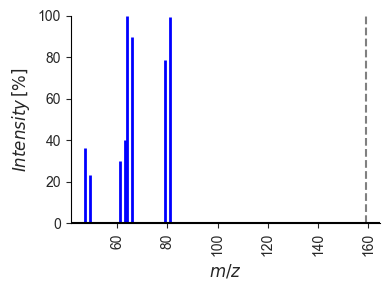

In [44]:
plotter.ms2_plot(spec_dd, pmz = row['precursor_mz'],
                    savepath= os.path.join(fig_dir, 'fig1_no_chemical_noise.png')
                    )